## Concept

Prediction can be thought as learning a function:
1. Transforming the problem into a mathematical model
    * Think about what features affect the outcome
    * Better we know about the field, better we can define the problem
2. Find the function with past data
    * Regression
    * Machine Learning
    * Neural Network
3. Test the function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Illustration

Consider f(x) = 1.2x + 0.8 to be the function to find

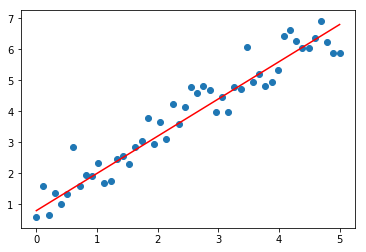

In [43]:
x = np.linspace(0, 5, 50)
y = 1.2*x + 0.8
y = y + 0.6*np.random.randn(50) #add some noise to make it more realistic
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'red')

## Scikit Learn

In [44]:
from sklearn.linear_model import LinearRegression

This library requires the data to be stored as separated arrays. That is, instead of an [1,50] array, an [50,1] array.

In [48]:
x = x.reshape(50,1)

First we declare a variable with type of linear regression.

In [49]:
regr = LinearRegression()

Then, input x and y to fit a linear model.

In [50]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Then, we can predict what does the function should look like.

In [51]:
Y = regr.predict(x)

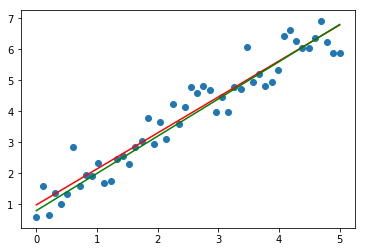

In [52]:
plt.scatter(x,y) #raw data
plt.plot(x, Y, 'red') #predicted line
plt.plot(x, 1.2*x + 0.8, 'green') #real line

## Overfitting

In [26]:
from ipywidgets import interact

In [56]:
X = np.linspace(0, 5, 1000)
def my_fit(n):
    Y = 4*np.sin(n*X) + 4
    plt.scatter(x, y)
    plt.plot(X, Y, 'red')

In [57]:
interact(my_fit, n=(1, 100))

interactive(children=(IntSlider(value=50, description='n', min=1), Output()), _dom_classes=('widget-interact',…

<function __main__.my_fit(n)>

Testing is important to avoid overfitting.

When preparing data, separate training data and test data.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [61]:
len(x_test) #50 times 0.2

10

In [64]:
x_train.shape = (40, 1)
x_test.shape = (10, 1)

Start training.

In [65]:
regr = LinearRegression()

In [66]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
training = regr.predict(x_train)

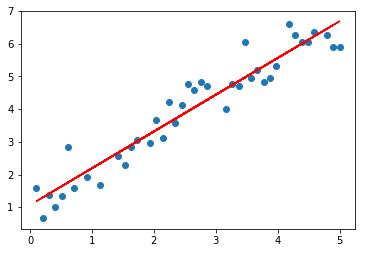

In [70]:
plt.scatter(x_train, y_train)
plt.plot(x_train, training, 'red')

Start testing by inputting test data to the trained model.

In [72]:
testing = regr.predict(x_test)

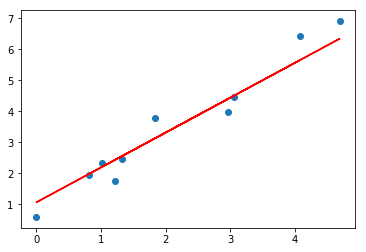

In [73]:
plt.scatter(x_test, y_test)
plt.plot(x_test, testing, 'red')

## Example

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Import Toy Dataset about housing prices in Boston.

In [77]:
from sklearn.datasets import load_boston
boston = load_boston()

To see what features are inside the dataset:

In [78]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Prepare the data.

In [79]:
X = boston.data
Y = boston.target

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=123)

Start the regression.

In [83]:
regr = LinearRegression()

In [88]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the model has been trained, we can start testing.

In [90]:
y_predict = regr.predict(x_test)

Below we plot out the y_test against our prediction of y based on x_test. If a diagonal line appears, y_test and y_predict are similar and we are likely to have a successful model.

Text(0,0.5,'Predicted Price')

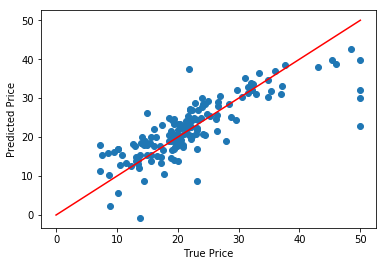

In [92]:
plt.scatter(y_test, y_predict)
plt.plot([0,50], [0, 50], 'red')
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

## Approximate the weight of each feature

Trick 1: Enumerate

In [93]:
L = list("ABC")

In [94]:
list(enumerate(L))

[(0, 'A'), (1, 'B'), (2, 'C')]

In [96]:
for i, j in enumerate(L):
    print(i+1, j)

1 A
2 B
3 C


When enumerate is used in for-loop, usually 2 loop counters are used: one for index, one for the element.

Trick 2: Drawing separate graphs

In [98]:
x = np.linspace(-10, 10, 200)

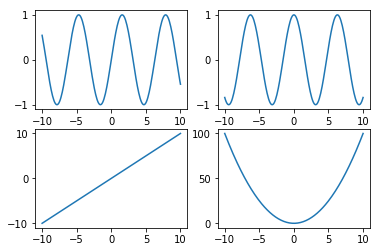

In [99]:
plt.subplot(2,2,1)                    #(2,2) means that the plots are to arranged in 2-by-2 matrix
plt.plot(x, np.sin(x))

plt.subplot(2,2,2)
plt.plot(x, np.cos(x))

plt.subplot(2,2,3)
plt.plot(x, x)

plt.subplot(2,2,4)
plt.plot(x, x**2)

Now we plot out the influence of features on price.

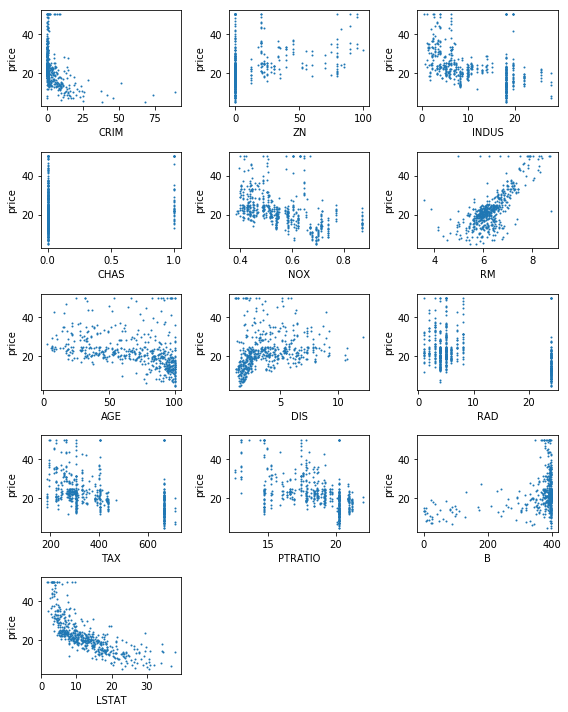

In [104]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)         #subplot as trick 2
    plt.scatter(X[:,i], Y, s=1)    #plot price (Y) against the value of feature (X[:,i])
    plt.ylabel("price")              #set label for y-axis
    plt.xlabel(feature)             #set label for x-axis
    plt.tight_layout()               #looks nicer